<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** 
 - Luis Felipe Gómez Estrada   
 - Eduardo Loza de la Torre  
**Fecha:** 22 de febrero del 2021.

**Expediente** : IF722749. 
**Expediente** :   
**Profesor:** Oscar David Jaramillo Zuluaga.

# Tarea 9: Clase 22
    
Replicar el procedimiento anterior para valoración de opciones 'call', pero en este caso para opciones tipo 'put' y compararlo con el valor teórico de la ecuación de Black-Scholes

## Luis Felipe Gómez Estrada

In [2]:
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import datetime
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('precision', 3)

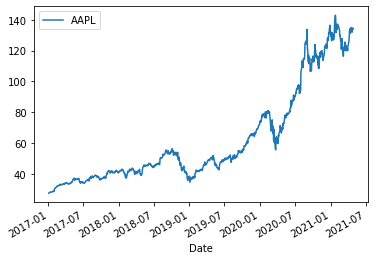

In [3]:
def get_adj_closes(tickers, start_date=None, end_date=None):
    closes = web.DataReader(name=tickers, data_source='yahoo', start=start_date, end=end_date)
    closes = closes['Adj Close']
    closes.sort_index(inplace=True)
    return closes

ticker = ['AAPL']
start_date = '2017-01-01'
closes_aapl = get_adj_closes(ticker, start_date)
closes_aapl.plot()
plt.legend(ticker)
plt.show()

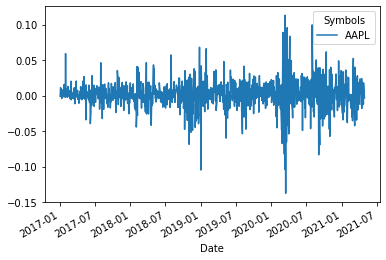

In [4]:
def calc_daily_ret(closes):
    return np.log(closes/closes.shift(1)).iloc[1:]

ret_aapl = calc_daily_ret(closes_aapl)
ret_aapl.plot()
plt.show()

In [5]:
aapl = web.YahooOptions('AAPL')
aapl_opt = aapl.get_all_data().reset_index()
aapl_opt.set_index('Expiry').sort_index()

,Strike,Type,Symbol,...,Quote_Time,Last_Trade_Date,JSON
Expiry,,,,,,,
2021-04-30,75.0,put,AAPL210430P00075000,...,2021-04-28 15:23:12,2021-04-27 13:30:01,"{'contractSymbol': 'AAPL210430P00075000', 'str..."
2021-04-30,132.0,put,AAPL210430P00132000,...,2021-04-28 15:23:12,2021-04-28 15:07:40,"{'contractSymbol': 'AAPL210430P00132000', 'str..."
2021-04-30,80.0,put,AAPL210430P00080000,...,2021-04-28 15:23:12,2021-04-26 16:38:05,"{'contractSymbol': 'AAPL210430P00080000', 'str..."
2021-04-30,80.0,call,AAPL210430C00080000,...,2021-04-28 15:23:12,2021-04-26 18:35:15,"{'contractSymbol': 'AAPL210430C00080000', 'str..."
2021-04-30,133.0,call,AAPL210430C00133000,...,2021-04-28 15:23:12,2021-04-28 15:06:27,"{'contractSymbol': 'AAPL210430C00133000', 'str..."
...,...,...,...,...,...,...,...
2023-06-16,120.0,call,AAPL230616C00120000,...,2021-04-28 15:23:16,2021-04-28 14:18:54,"{'contractSymbol': 'AAPL230616C00120000', 'str..."
2023-06-16,120.0,put,AAPL230616P00120000,...,2021-04-28 15:23:16,2021-04-27 18:59:46,"{'contractSymbol': 'AAPL230616P00120000', 'str..."
2023-06-16,125.0,call,AAPL230616C00125000,...,2021-04-28 15:23:16,2021-04-28 14:51:31,"{'contractSymbol': 'AAPL230616C00125000', 'str..."


In [6]:
aapl_opt.Underlying_Price[0]

133.95

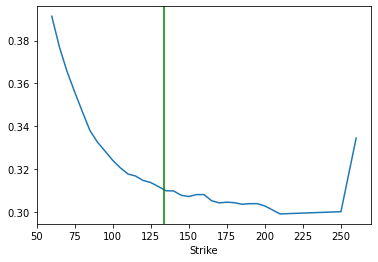

In [10]:
# fecha1 = '2021-01-15'
# put06_f1 = aapl_opt.loc[(aapl_opt.Expiry==fecha1) & (aapl_opt.Type=='put')]
puts = aapl_opt.loc[(aapl_opt.Expiry=='2023-06-16') & (aapl_opt.Type=='put')]
ax = puts.set_index('Strike').loc[:, 'IV'].plot()
ax.axvline(puts.Underlying_Price.iloc[0], color='g')
plt.show()

In [14]:
K = 130 # strike price
indice_opt = aapl_opt.loc[(aapl_opt.Type=='put') & (aapl_opt.Strike==K) & (aapl_opt.Expiry=='2023-06-16')]
indice_opt

,Strike,Expiry,Type,...,Quote_Time,Last_Trade_Date,JSON
1149,130.0,2023-06-16,put,...,2021-04-28 15:23:16,2021-04-28 15:00:39,"{'contractSymbol': 'AAPL230616P00130000', 'str..."


In [15]:
i_opt= indice_opt.index
opcion_valuar = aapl_opt.loc[i_opt[0]]
opcion_valuar['JSON']

{'contractSymbol': 'AAPL230616P00130000',
 'strike': 130.0,
 'currency': 'USD',
 'lastPrice': 21.35,
 'change': -0.049999237,
 'percentChange': -0.2336413,
 'volume': 11,
 'openInterest': 356,
 'bid': 21.4,
 'ask': 21.85,
 'contractSize': 'REGULAR',
 'expiration': 1686873600,
 'lastTradeDate': 1619622039,
 'impliedVolatility': 0.3117744604492187,
 'inTheMoney': False}

In [16]:
print('Precio del activo subyacente actual = ',opcion_valuar.Underlying_Price)

Precio del activo subyacente actual =  133.9499


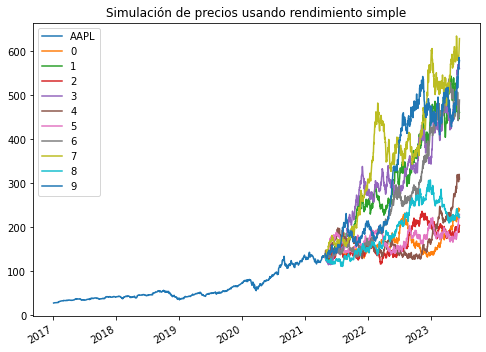

In [18]:
from datetime import date
Ri = closes_aapl.pct_change(1).iloc[1:]
mu_R = Ri.mean()[0]
sigma_R = Ri.std()[0]

today = pd.Timestamp(date.today())
expiry = opcion_valuar.Expiry
ndays = (expiry - today).days
nscen = 1000
dates = pd.date_range(start = today, periods = ndays)

dt = 1
Z = np.random.randn(ndays,nscen)
# Simulación normal de los rendimientos
Ri_dt = pd.DataFrame(mu_R*dt+Z*sigma_R*np.sqrt(dt),index=dates)
Ri_dt.cumprod()

# Simulación del precio
S_0 = closes_aapl.iloc[-1,0]
S_T = S_0*(1+Ri_dt).cumprod()
S_T.iloc[0,:] = S_0

# Se muestran los precios simulados con los precios descargados
pd.concat([closes_aapl, S_T.iloc[:, :10]]).plot(figsize=(8,6));
plt.title('Simulación de precios usando rendimiento simple');

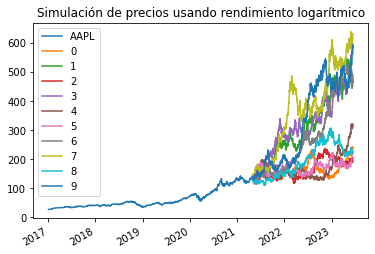

In [20]:
#Rendimiento logaritmico
ri = calc_daily_ret(closes_aapl)
mu_r = ri.mean()[0]
sigma_r = ri.std()[0]

sim_ret_ri = pd.DataFrame(mu_r*dt+Z*sigma_r*np.sqrt(dt), index=dates)

# Simulación del precio
S_0 = closes_aapl.iloc[-1,0]
S_T2 = S_0*np.exp(sim_ret_ri.cumsum())

# Se muestran los precios simulados con los precios descargados
pd.concat([closes_aapl,S_T2.iloc[:, :10]]).plot()
plt.title('Simulación de precios usando rendimiento logarítmico')
plt.show()

In [21]:
e1 = np.abs(S_T-S_T2).mean().mean()
e1

1.2680281363830848

Con los precios simulados debemos de encontrar el valor de la opción según la función de pago correspondiente. Para este caso es porque es tipo `put`:
$$
max(K−S_T,0)
$$

In [22]:
mu = ret_aapl.mean()[0]
sigma = ret_aapl.std()[0]
mu, sigma

(0.001459380993643653, 0.019921938954204625)

In [23]:
# Tasa de bonos de 1 yr de fecha 26/04/2021 -> 0.06%
r = 0.0006/252 # Tasa diaria

In [28]:
#Simulando 10 escenarios hata fecha de expiry
from datetime import date

today = pd.Timestamp(date.today())
expiry = opcion_valuar.Expiry

ndays = (expiry - today).days
nscen = 10
dates = pd.date_range(start='2021-04-28', periods = ndays)
#len(dates)

#Rendimientos simulados
sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r, index=dates)
sim_ret.cumsum()

,0,1,2,...,7,8,9
2021-04-28,0.003,0.025,0.032,...,2.363e-04,1.080e-02,0.043
2021-04-29,0.008,0.017,0.003,...,3.015e-03,-4.180e-04,0.048
2021-04-30,-0.013,0.038,-0.004,...,1.731e-02,-8.873e-03,0.055
2021-05-01,-0.003,0.031,0.007,...,2.786e-02,-4.613e-02,0.046
2021-05-02,-0.026,0.033,0.036,...,4.241e-02,-5.752e-02,0.046
...,...,...,...,...,...,...,...
2023-06-11,0.952,1.205,-0.374,...,5.528e-02,-7.804e-01,0.487
2023-06-12,0.972,1.193,-0.344,...,5.829e-02,-7.795e-01,0.497
2023-06-13,0.983,1.213,-0.338,...,8.947e-02,-7.660e-01,0.477
2023-06-14,0.958,1.236,-0.379,...,9.137e-02,-7.593e-01,0.470


In [29]:
S0 = closes_aapl.iloc[-1,0]  # Condición inicial del precio a simular
sim_closes = S0*np.exp(sim_ret.cumsum())
sim_closes.iloc[0, :] = S0
sim_closes

,0,1,2,...,7,8,9
2021-04-28,133.970,133.970,133.970,...,133.970,133.970,133.970
2021-04-29,135.014,136.327,134.426,...,134.374,133.914,140.625
2021-04-30,132.176,139.201,133.438,...,136.310,132.786,141.606
2021-05-01,133.564,138.206,134.901,...,137.755,127.930,140.266
2021-05-02,130.498,138.472,138.907,...,139.774,126.481,140.292
...,...,...,...,...,...,...,...
2023-06-11,347.212,446.891,92.127,...,141.584,61.390,218.002
2023-06-12,353.978,441.732,94.975,...,142.011,61.442,220.312
2023-06-13,357.852,450.405,95.589,...,146.509,62.279,215.939
2023-06-14,349.345,461.253,91.680,...,146.787,62.700,214.415


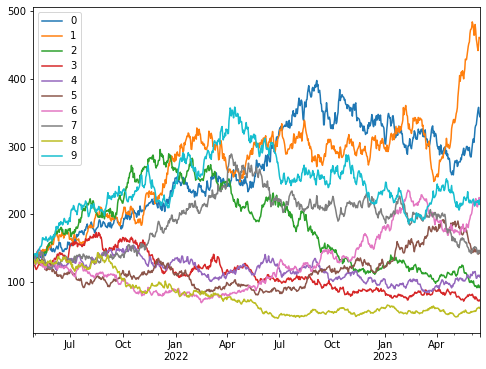

In [30]:
sim_closes.plot(figsize=(8,6));

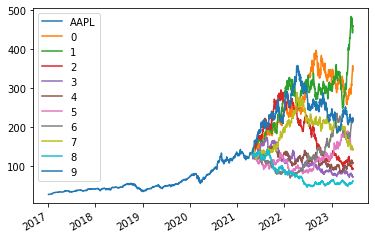

In [31]:
pd.concat([closes_aapl,sim_closes]).plot()
plt.show()

[]

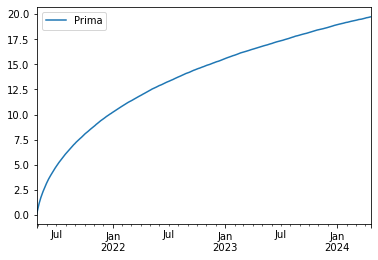

In [32]:
from datetime import date
Hoy = date.today()

# strike price de la opción
K = opcion_valuar['JSON']['strike']  

# Fechas a simular
dates = pd.date_range(start= Hoy, periods = ndays, freq='B')

# Escenarios y número de días
ndays = len(dates)
nscen = 100000

# Condición inicial del precio a simular
S0 = closes_aapl.iloc[-1,0]  

# simular rendimientos
sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r,index=dates)

# Simular precios
sim_closes = S0*np.exp(sim_ret.cumsum())

strike = pd.DataFrame(K*np.ones([ndays,nscen]), index=dates)
put = pd.DataFrame({'Prima':np.exp(-r*ndays) \
              *np.fmax(strike-sim_closes,np.zeros([ndays,nscen])).mean(axis=1)}, index=dates)
put.plot()
plt.plot()

La valuación de la opción es:

In [33]:
put.iloc[-1]

Prima    19.741
Name: 2024-04-22 00:00:00, dtype: float64

In [34]:
confianza = 0.99
sigma_est = sim_closes.iloc[-1].sem()
mean_est = put.iloc[-1].Prima
i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
print(i1)

(18.969641219280593, 20.51322677499473)


In [35]:
opcion_valuar['JSON']

{'contractSymbol': 'AAPL230616P00130000',
 'strike': 130.0,
 'currency': 'USD',
 'lastPrice': 21.35,
 'change': -0.049999237,
 'percentChange': -0.2336413,
 'volume': 11,
 'openInterest': 356,
 'bid': 21.4,
 'ask': 21.85,
 'contractSize': 'REGULAR',
 'expiration': 1686873600,
 'lastTradeDate': 1619622039,
 'impliedVolatility': 0.3117744604492187,
 'inTheMoney': False}

### Usando reducción de varianza

[]

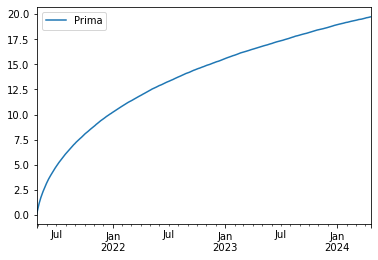

In [37]:
U = (np.arange(0,nscen)+np.random.rand(ndays,nscen))/nscen
Z = st.norm.ppf(U)

sim_ret2 = pd.DataFrame(sigma*Z+r,index=dates)
sim_closes2 = S0*np.exp(sim_ret.cumsum())

# Función de pago
strike = pd.DataFrame(K*np.ones([ndays,nscen]), index=dates)
put2 = pd.DataFrame({'Prima':np.exp(-r*ndays) \
              *np.fmax(strike-sim_closes2,np.zeros([ndays,nscen])).mean(axis=1)}, index=dates)
put2.plot()
plt.plot()

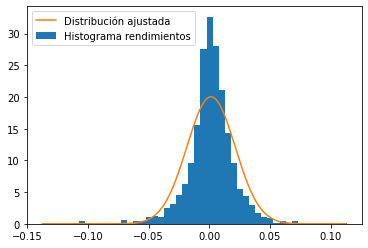

In [38]:
ren = calc_daily_ret(closes_aapl) # rendimientos 
y,x,_ = plt.hist(ren['AAPL'],bins=50,density=True,label='Histograma rendimientos')

mu_fit,sd_fit = st.norm.fit(ren) # Se ajustan los parámetros de una normal
# Valores máximo y mínimo de los rendiemientos a generar
ren_max = max(x);ren_min = min(x)
# Vector de rendimientos generados
ren_gen = np.arange(ren_min,ren_max,0.001)
# Generación de la normal ajustado con los parámetros encontrados
curve_fit = st.norm.pdf(ren_gen,loc=mu_fit,scale=sd_fit)
plt.plot(ren_gen,curve_fit,label='Distribución ajustada')
plt.legend()
plt.show()

Vemos que la distribución normal no se ajusta muy bien al histograma de los rendimientos, por lo que intentaremos con la distribución T

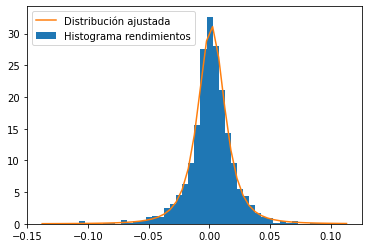

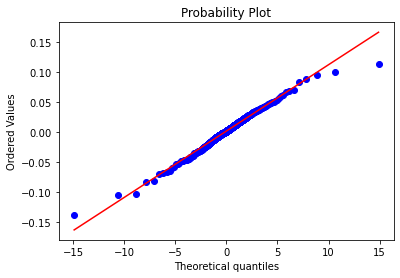

In [39]:
# rendimientos 
ren = calc_daily_ret(closes_aapl) 

# Histograma de los rendimientos
y, x, _ = plt.hist(ren['AAPL'], bins=50, density=True, label='Histograma rendimientos')

# Se ajustan los parámetros de una distribución
dist = 't'
params = getattr(st, dist).fit(ren.values) 

# Generación de la pdf de la distribución ajustado con los parámetros encontrados
curve_fit = getattr(st, dist).pdf(x, *params)
plt.plot(x, curve_fit, label='Distribución ajustada')
plt.legend()
plt.show()

# Q-Q
st.probplot(ren['AAPL'], sparams=params[:-2], dist=dist, plot=plt);


In [45]:
ndays = len(dates) 
nscen = 10
prob = y/np.sum(y)
values = x[1:]

# Rendimientos simulados
ret = np.random.choice(values, ndays*nscen, p=prob)
# Fechas
dates = pd.date_range(start=Hoy,periods=ndays)
# Rendimien en Data Frame
sim_ret_hist = pd.DataFrame(ret.reshape((ndays,nscen)),index=dates)
sim_ret_hist

,0,1,2,...,7,8,9
2021-04-28,-0.017,-0.002,-0.007,...,0.003,0.018,-0.002
2021-04-29,-0.002,0.003,0.018,...,0.013,-0.057,0.008
2021-04-30,0.028,0.018,-0.007,...,0.003,-0.007,-0.002
2021-05-01,0.003,-0.022,0.003,...,-0.027,-0.007,-0.012
2021-05-02,-0.022,-0.007,0.003,...,-0.002,-0.007,-0.002
...,...,...,...,...,...,...,...
2023-06-11,-0.002,0.038,-0.002,...,0.023,0.003,-0.012
2023-06-12,-0.022,-0.017,0.033,...,-0.027,-0.007,0.033
2023-06-13,0.003,-0.022,0.003,...,0.028,-0.017,-0.002
2023-06-14,-0.002,0.008,-0.012,...,-0.002,0.013,0.003


In [46]:
sim_closes_hist = (closes_aapl.iloc[-1,0])*np.exp(sim_ret_hist.cumsum())
sim_closes_hist

,0,1,2,...,7,8,9
2021-04-28,131.673,133.670,133.001,...,134.342,136.380,133.670
2021-04-29,131.379,134.042,135.394,...,136.075,128.768,134.716
2021-04-30,135.091,136.453,134.415,...,136.453,127.837,134.415
2021-05-01,135.466,133.442,134.788,...,132.775,126.912,132.775
2021-05-02,132.477,132.477,135.163,...,132.477,125.995,132.477
...,...,...,...,...,...,...,...
2023-06-11,2690.293,986.283,3190.695,...,2062.116,3671.953,3492.265
2023-06-12,2630.938,969.374,3297.351,...,2006.527,3645.398,3609.001
2023-06-13,2638.253,947.987,3306.519,...,2063.221,3582.901,3600.923
2023-06-14,2632.348,955.404,3266.178,...,2058.603,3629.098,3610.935


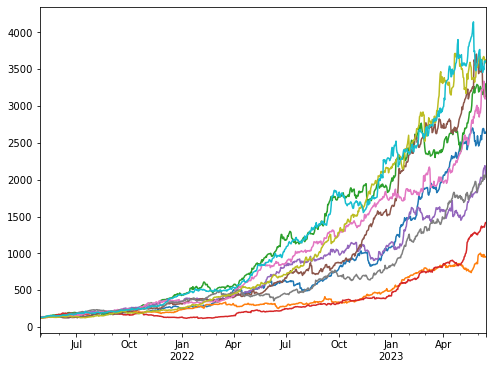

In [47]:
sim_closes_hist.plot(figsize=(8,6),legend=False);

Text(0.5, 1.0, 'Simulación usando el histograma de los rendimientos')

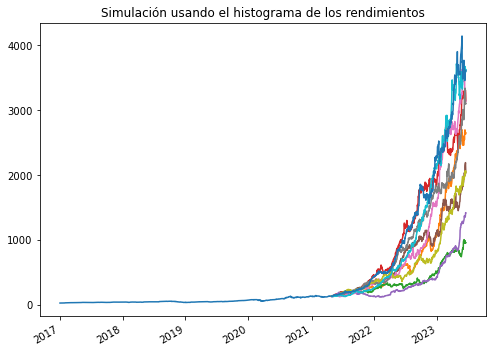

In [48]:
pd.concat([closes_aapl,sim_closes_hist]).plot(figsize=(8,6),legend=False);
plt.title('Simulación usando el histograma de los rendimientos')

In [49]:
K = opcion_valuar['JSON']['strike']
ndays = len(dates)
nscen = 100000

# Histograma tomando la tasa libre de riesgo
freq, values = np.histogram(ret_aapl+r-mu, bins=2000)
prob = freq/np.sum(freq)

# Simulación de los rendimientos
ret = np.random.choice(values[1:], ndays*nscen, p=prob)

# Simulación de precios
sim_ret_hist = pd.DataFrame(ret.reshape((ndays,nscen)),index=dates)
sim_closes_hist = (closes_aapl.iloc[-1,0]) * np.exp(sim_ret_hist.cumsum())

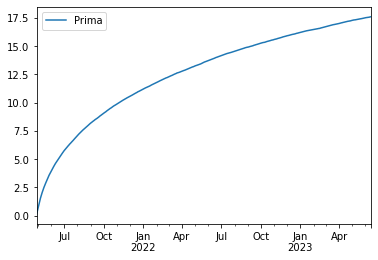

In [50]:
strike = pd.DataFrame(K*np.ones(ndays*nscen).reshape((ndays,nscen)), index=dates)
put_hist = pd.DataFrame({'Prima':np.exp(-r*ndays)*np.fmax(strike-sim_closes_hist,np.zeros(ndays*nscen).reshape((ndays,nscen))).T.mean()}, index=dates)
put_hist.plot();

In [51]:
put_hist.iloc[-1]

Prima    17.61
Name: 2023-06-15 00:00:00, dtype: float64

In [52]:
opcion_valuar['JSON']

{'contractSymbol': 'AAPL230616P00130000',
 'strike': 130.0,
 'currency': 'USD',
 'lastPrice': 21.35,
 'change': -0.049999237,
 'percentChange': -0.2336413,
 'volume': 11,
 'openInterest': 356,
 'bid': 21.4,
 'ask': 21.85,
 'contractSize': 'REGULAR',
 'expiration': 1686873600,
 'lastTradeDate': 1619622039,
 'impliedVolatility': 0.3117744604492187,
 'inTheMoney': False}

In [54]:
confianza = 0.95
sigma_est = sim_closes_hist.iloc[-1].sem()
mean_est = put_hist.iloc[-1].Prima
i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i1)
print(i2)

(16.993506538576256, 18.225523252812998)
(16.993513994597016, 18.225515796792237)


Por lo que podemos observar los precios de la prima resultantes como lo es 17.61 o 19.741 tomando en cuenta 10 escenarios con la fechas seleccionadas con anterioridad y estimación del precio para un opción tipo put. 

## Eduardo Loza